1.
  *  3D Surface Plot
  *  Best First Search (BFS)












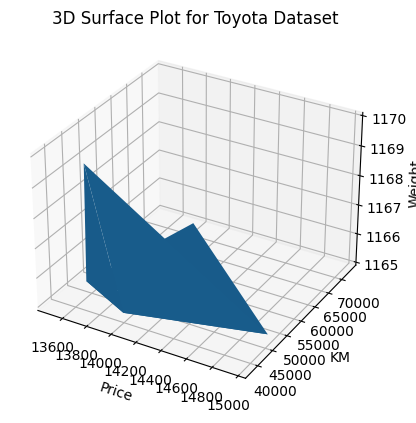

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Toyota.csv')
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_trisurf(df['Price'][:5],df['KM'][:5],df['Weight'][:5])
ax.set_xlabel('Price')
ax.set_ylabel('KM')
ax.set_zlabel('Weight')
plt.title('3D Surface Plot for Toyota Dataset')
plt.show()

In [14]:
from queue import PriorityQueue
v=14
graph=[[] for i in range(v)]
def best_first_search(actual_src,target,n):
  visited=[False]*n
  pq=PriorityQueue()
  pq.put((0,actual_src))
  visited[actual_src]=True
  while pq.empty()==False:
    u=pq.get()[1]
    print(u,end=' ')
    if u==target:
      break
    for v,c in graph[u]:
      if visited[v]==False:
        visited[v]=True
        pq.put((c,v))
  print()
def addEdge(x,y,cost):
  graph[x].append((y,cost))
  graph[y].append((x,cost))
addEdge(0,1,3)
addEdge(0,2,6)
addEdge(0,3,5)
addEdge(1,4,9)
addEdge(1,5,8)
addEdge(2,6,12)
addEdge(2,7,14)
addEdge(3,8,7)
addEdge(8,9,5)
addEdge(8,10,6)
addEdge(9,11,1)
addEdge(9,12,10)
addEdge(9,13,2)
src=0
trgt=9
best_first_search(src,trgt,v)

0 1 3 2 8 9 


2.
*   Contour Plot
*   A* Algorithm



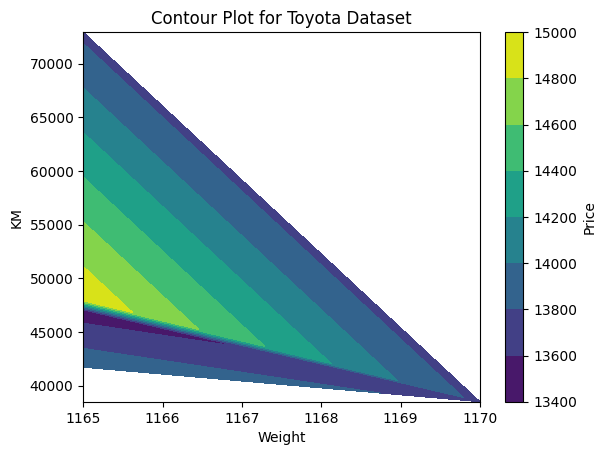

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Toyota.csv')
plt.figure()
plt.tricontourf(df['Weight'][:5],df['KM'][:5],df['Price'][:5])
plt.xlabel('Weight')
plt.ylabel('KM')
plt.colorbar(label='Price')
plt.title('Contour Plot for Toyota Dataset')
plt.show()


In [22]:
from queue import PriorityQueue
def a_star_algorithm(graph,heuristic,source,goal):
  visited=[]
  pq=PriorityQueue()
  pq.put((0,[source]))
  while not pq.empty():
    cost,path=pq.get()
    node=path[-1]
    if node==goal:
      visited.append(node)
      return (visited,path)
    visited.append(node)
    for adj,weight in graph[node]:
      if adj not in visited:
        pri=heuristic[adj]
        new_path=list(path)
        new_path.append(adj)
        pq.put(((pri+weight),new_path))
  return None
n=4
e=5
graph=[[] for _ in range(n)]
graph[0].append((1,1))
graph[0].append((2,3))
graph[0].append((3,7))
graph[1].append((3,5))
graph[2].append((3,12))
heuristic={}
heuristic[0]=1
heuristic[1]=1
heuristic[2]=1
heuristic[3]=1
source=0
goal=3
res=a_star_algorithm(graph,heuristic,source,goal)
if res==None:
  print('Cannot reach goal node')
else:
  print('The path is')
  for i in res[1]:
    print(i,end='-->')
  print()
  print('The visiting order is')
  for i in res[0]:
    print(i,end='-->')
  print()




The path is
0-->1-->3-->
The visiting order is
0-->1-->2-->3-->


3.

*   Heat Map
*   MiniMax Algorithm



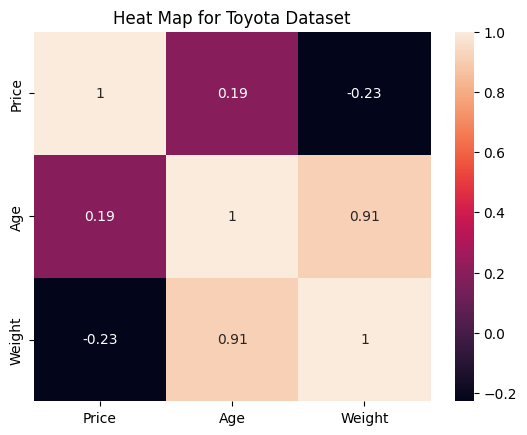

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Toyota.csv')
dimensions=['Price','Age','Weight']
corr_matrix=df[dimensions][:5].corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Heat Map for Toyota Dataset')
plt.show()

In [31]:
import math
def minimax(curDepth,nodeIndex,maxTurn,scores,targetDepth):
  if curDepth==targetDepth:
    return scores[nodeIndex]
  if maxTurn:
    return max(minimax(curDepth+1,nodeIndex*2,False,scores,targetDepth),minimax(curDepth+1,nodeIndex*2+1,False,scores,targetDepth))
  else:
    return min(minimax(curDepth+1,nodeIndex*2,True,scores,targetDepth),minimax(curDepth+1,nodeIndex*2+1,True,scores,targetDepth))
scores=[3,5,2,9,12,5,23,23]
targetDepth=math.log(len(scores),2)
res=minimax(0,0,True,scores,targetDepth)
print('The optimal value is',res)


The optimal value is 12


4.

*   Box Plot
*   Alpha Beta Pruning




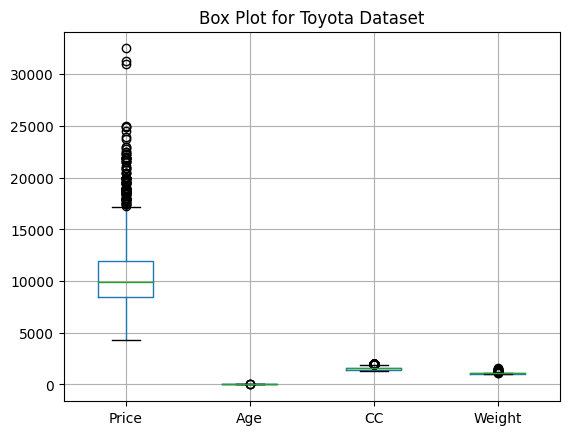

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Toyota.csv')
dimensions=['Price','Age','CC','Weight']
df[dimensions].boxplot()
plt.title('Box Plot for Toyota Dataset')
plt.show()


In [38]:
MAX,MIN=1000,-1000
def minimax(depth,nodeIndex,maximizingPlayer,values,alpha,beta):
  if depth==3:
    return values[nodeIndex]
  if maximizingPlayer:
    best=MIN
    for i in range(0,2):
      val=minimax(depth+1,nodeIndex*2+i,False,values,alpha,beta)
      best=max(best,val)
      alpha=max(alpha,best)
      if beta<=alpha:
        break
    return best
  else:
    best=MAX
    for i in range(0,2):
      val=minimax(depth+1,nodeIndex*2+i,True,values,alpha,beta)
      best=min(best,val)
      beta=min(beta,best)
      if beta<=alpha:
        break
    return best
values=[3,5,6,9,1,2,0,-1]
res=minimax(0,0,True,values,MIN,MAX)
print('The optimal value is',res)

The optimal value is 5


5.   Naive Bayes Classifier on Titanic Dataset

In [5]:
import numpy as np
import pandas as pd
class NaiveBayes:
  def __init__(self):
    self.prior={}
    self.conditional={}
  def fit(self,X,y):
    n_samples,n_featues=X.shape
    self.classes=np.unique(y)
    for c in self.classes:
      self.prior[c]=np.mean(y==c)
    for feature in X.columns:
      self.conditional[feature]={}
      for c in self.classes:
        feature_values=X[feature][y==c]
        self.conditional[feature][c]={
           'mean':np.mean(feature_values),
           'std':np.std(feature_values)
         }
  def predict(self,X):
    y_pred=[]
    for _,sample in X.iterrows():
      probabilities={}
      for c in self.classes:
        probabilities[c]=self.prior[c]
        for feature in X.columns:
          mean=self.conditional[feature][c]['mean']
          std=self.conditional[feature][c]['std']
          x=sample[feature]
          probabilities[c]*=self._gaussian_pdf(x,mean,std)
      y_pred.append(max(probabilities,key=probabilities.get))
    return y_pred
  @staticmethod
  def _gaussian_pdf(x,mean,std):
    exponent=np.exp(-((x-mean)**2)/(2*std**2))
    return (1/(np.sqrt(2*np.pi)*std))*exponent
df=pd.read_csv('Titanic.csv')
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Sex']=df['Sex'].map({'female':0,'male':1})
X=df.drop('Survived',axis=1)
y=df['Survived']

classifier=NaiveBayes()
classifier.fit(X,y)
y_pred=classifier.predict(X)
accuracy=np.mean(y_pred==y)
print('Accuracy:',accuracy)


Accuracy: 0.792368125701459


6. KNN Classifier Euclidean Glass Dataset -> k=3,test_size=0.3

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
def euclidean_distance(x1,x2):
  distance=np.sqrt(np.sum((x1-x2)**2))
  return distance
class KNN:
  def __init__(self,k=3):
    self.k=k
  def fit(self,X,y):
    self.X_train=X
    self.y_train=y
  def predict(self,X):
    predictions=[self._predict(x) for x in X]
    return predictions
  def _predict(self,x):
    distances=[euclidean_distance(x,x_train) for x_train in self.X_train]
    k_indices=np.argsort(distances)[:self.k]
    k_nearest_labels=[self.y_train[i] for i in k_indices]
    most_common=Counter(k_nearest_labels).most_common()
    return most_common[0][0]
df=pd.read_csv('glass.csv')
X=df.drop('Type',axis=1).values
y=df['Type'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(predictions)
accuracy=(np.sum(predictions==y_test))/(len(y_test))
print('Accuracy:',accuracy)



[2, 1, 1, 7, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 5, 1, 1, 5, 5, 2, 2, 1, 7, 2, 1, 3, 1, 5, 1, 2, 7, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 7, 2, 2, 2, 7, 7, 2, 1, 7, 6, 3, 1, 1, 1, 1, 2, 3, 1, 7, 1, 1, 5, 2, 2]
Accuracy: 0.6307692307692307


7. KNN Classifier Manhattan Fruit Dataset -> k=5,test_size=0.2

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
def manhattan_distance(x1,x2):
  distance=np.sum(np.abs(x1-x2))
  return distance
class KNN:
  def __init__(self,k=5):
    self.k=k
  def fit(self,X,y):
    self.X_train=X
    self.y_train=y
  def predict(self,X):
    predictions=[self._predict(x) for x in X]
    return predictions
  def _predict(self,x):
    distances=[euclidean_distance(x,x_train) for x_train in self.X_train]
    k_indices=np.argsort(distances)[:self.k]
    k_nearest_labels=[self.y_train[i] for i in k_indices]
    most_common=Counter(k_nearest_labels).most_common()
    return most_common[0][0]
df=pd.read_csv('fruit.csv')
label_encoder=LabelEncoder()
df['fruit_label']=label_encoder.fit_transform(df['fruit_label'])
#df['fruit_subtype']=df['fruit_subtype'].factorize()[0]
X=df.drop('fruit_label',axis=1).values
y=df['fruit_label'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

clf=KNN(k=5)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(predictions)
accuracy=(np.sum(predictions==y_test))/(len(y_test))
print('Accuracy:',accuracy)


[2, 3, 0, 2, 1, 3, 2, 0, 2, 3, 0, 3]
Accuracy: 0.5833333333333334


8.KMEANS CLUSTERING ON IRIS DATASET

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]

Centroids [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


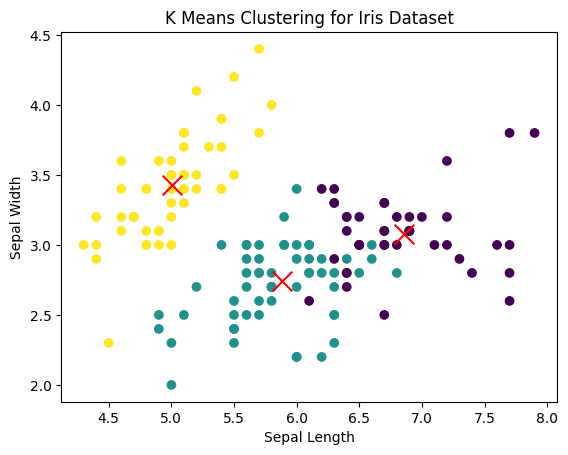

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

def kmeans(X,K,maxiters=100):
  centroids=X[:K]
  for _ in range(maxiters):
    labels=np.argmin(np.linalg.norm(X[:,np.newaxis] -centroids,axis=2),axis=1)
    new_centroids=np.array([X[labels==k].mean(axis=0) for k in range(K)])
    if np.all(new_centroids==centroids):
      break
    centroids=new_centroids
  return labels,centroids
data=load_iris()
X=data.data
K=3
labels,centroids=kmeans(X,K)
print('Labels:',labels)
print('\nCentroids',centroids)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=200)
plt.title('K Means Clustering for Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

9. AGGLOMERATIVE CLUSTERING SINGLE,COMPLETE LINKAGE

Single Linkage Matrix:
 [[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]
Complete Linkage Matrix:
 [[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]


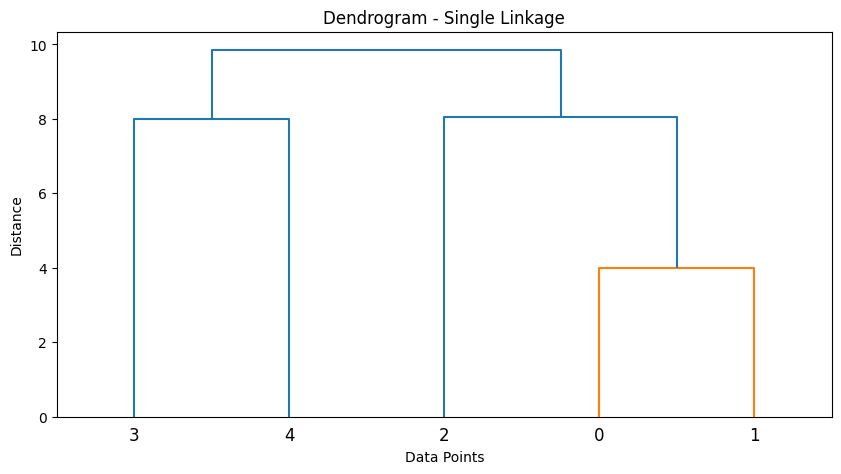

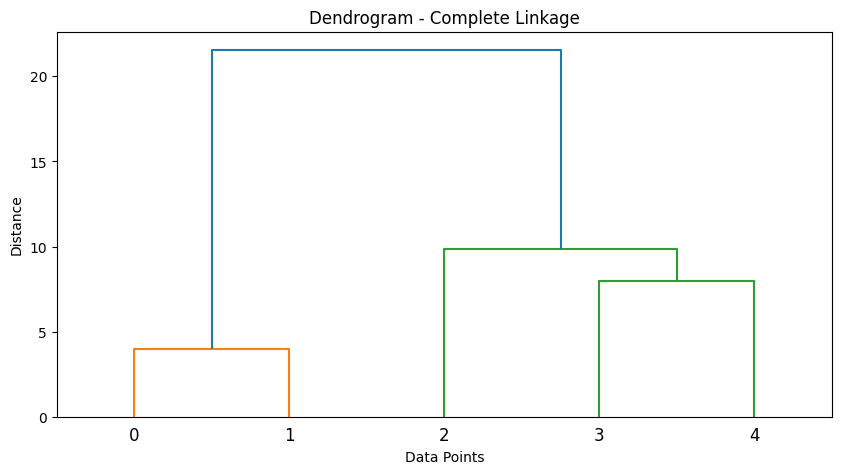

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

data=np.array([[4,4],
               [8,4],
               [15,8],
               [24,4],
               [24,12]])
def single_linkage(data):
  n=data.shape[0]
  proximity_matrix=np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      proximity_matrix[i,j]=np.min(np.linalg.norm(data[i]-data[j]))
      proximity_matrix[j,i]= proximity_matrix[i,j]
  return  proximity_matrix
def complete_linkage(data):
  n=data.shape[0]
  proximity_matrix=np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      proximity_matrix[i,j]=np.max(np.linalg.norm(data[i]-data[j]))
      proximity_matrix[j,i]= proximity_matrix[i,j]
  return  proximity_matrix
single_linkage_matrix=single_linkage(data)
print('Single Linkage Matrix:\n',single_linkage_matrix)
complete_linkage_matrix=complete_linkage(data)
print('Complete Linkage Matrix:\n',complete_linkage_matrix)
linkage_matrix=linkage(data,method='single')
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
linkage_matrix=linkage(data,method='complete')
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

10.

*   Principal Component Analysis (PCA)
*   Linear Discriminant Analysis (LDA)



Shape of X: (150, 4) 
Shape of Transformed X: (150, 2)


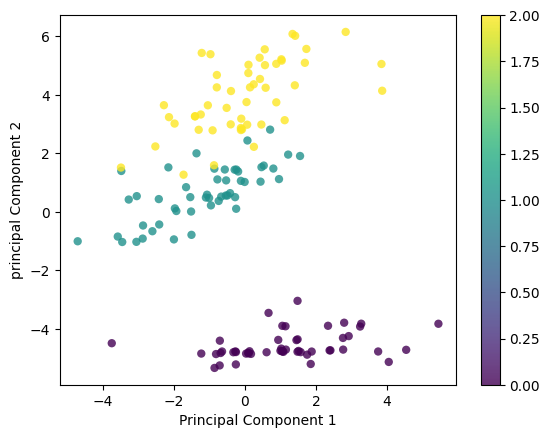

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class PCA:
  def __init__(self,n_components):
    self.n_components=n_components
    self.components=None
    self.mean=None
  def fit(self,X):
    self.mean=np.mean(X,axis=0)
    X=X-self.mean
    cov=np.cov(X.T)
    eigenvectors,eigenvalues=np.linalg.eig(cov)
    eigenvectors=eigenvectors.T
    idxs=np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[idxs]
    eigenvectors=eigenvectors[idxs]
    self.components=eigenvectors[:self.n_components]
  def transform(self,X):
    X=X-self.mean
    return np.dot(X,self.components.T)
pca=PCA(2)
data=datasets.load_iris()
X,y=data.data,data.target
pca.fit(X)
X_Projected=pca.transform(X)
print('Shape of X:',X.shape,'\nShape of Transformed X:',X_Projected.shape)
x1=X_Projected[:,0]
x2=X_Projected[:,1]
plt.scatter(
    x1,x2,c=y,edgecolor="none",alpha=0.8,cmap="viridis"
)
plt.xlabel('Principal Component 1')
plt.ylabel('principal Component 2')
plt.colorbar()
plt.show()

(4, 4)
(120, 2)


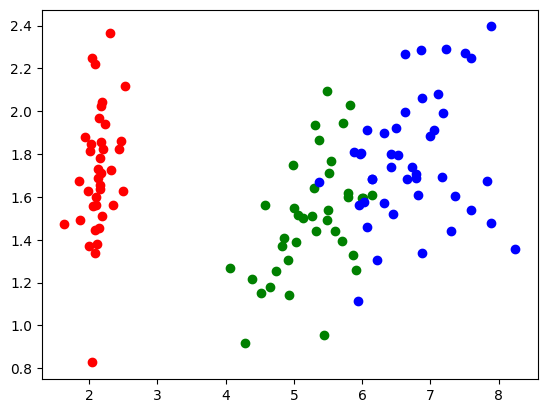

Original Data Size: (120, 4) 
Modified Data Size: (120, 2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

class LDA:
  def __init__(self,n_components=None):
    self.n_components=n_components
    self.eig_vectors=None
  def transform(self,X,y):
    height,width=X.shape
    unique_classes=np.unique(y)
    num_classes=len(unique_classes)

    scatter_t=np.cov(X.T)*(height-1)
    scatter_w=0
    for i in range(num_classes):
      class_items=np.flatnonzero(y==unique_classes[i])
      scatter_w=scatter_w+(np.cov(X[class_items].T)*(len(class_items)-1))
    scatter_b=scatter_t-scatter_w
    _,eig_vectors=(np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b)))
    print(eig_vectors.shape)
    pc=X.dot(eig_vectors[:,::-1][:,:self.n_components])
    print(pc.shape)

    if self.n_components==2:
      if y is None:
        plt.scatter(pc[:,0],pc[:,1])
      else:
        colors=['r','g','b']
        labels=np.unique(y)
        for color,label in zip(colors,labels):
          class_data=pc[np.flatnonzero(y==label)]
          plt.scatter(class_data[:,0],class_data[:,1],c=color)
      plt.show()
    return pc
LDA_obj=LDA(n_components=2)
data=load_iris()
X,y=data.data,data.target
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

LDA_object=LDA(n_components=2)
X_train_modified=LDA_object.transform(X_train,Y_train)

print('Original Data Size:',X_train.shape,'\nModified Data Size:',X_train_modified.shape)



